In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## 5.1

In [2]:
tcs = pd.read_csv('TCS.csv')
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [3]:
print('Mean Daily Return: ', tcs['Close Price'].pct_change().fillna(0).mean())
print('Daily Standard Deviation: ', tcs['Close Price'].pct_change().fillna(0).std())
print('Annual Mean: ', tcs['Close Price'].pct_change().fillna(0).mean()*252)
print('Annual Standard Deviation: ', tcs['Close Price'].pct_change().fillna(0).std()*math.sqrt(252))

Mean Daily Return:  0.00029473688361705396
Daily Standard Deviation:  0.027052226491492172
Annual Mean:  0.0742736946714976
Annual Standard Deviation:  0.42944078224249


## 5.2

In [4]:
rcom = pd.read_csv('RCOM.csv')
pvr = pd.read_csv('PVR.csv')
pnb = pd.read_csv('PNB.csv')
itc = pd.read_csv('ITC.csv')
tcs = pd.read_csv('TCS.csv')
data = pd.concat([rcom['Close Price'], pnb['Close Price'], itc['Close Price'], pvr['Close Price'], tcs['Close Price']], join='inner', axis=1, keys=['RCOM', 'PNB', 'ITC', 'PVR', 'TCS'])
data.head()

,RCOM,PNB,ITC,PVR,TCS
0,32.00,166.80,277.95,1524.95,2365.10
1,32.10,174.15,283.45,1539.00,2429.15
2,31.95,165.05,281.65,1530.30,2455.35
3,31.05,158.50,277.90,1515.05,2536.20
4,30.55,155.20,286.20,1513.55,2507.15


In [5]:
daily_mean = data.pct_change().mean()
cov_matrix = data.pct_change().cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
portfolio_return = round(np.sum(daily_mean * weights) * 252,2)
portfolio_std = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio Annual Return: ', portfolio_return)
print('Portfolio Volatility: ', portfolio_std)

Portfolio Annual Return:  -0.17
Portfolio Volatility:  0.27


## 5.3

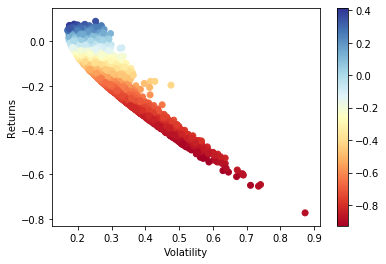

In [6]:
daily_mean = data.pct_change().mean()
cov_matrix = data.pct_change().cov()
n = 10000
result = np.zeros((3, n))
for i in range(n):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(daily_mean * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    result[0,i] = portfolio_return
    result[1,i] = portfolio_std
    result[2,i] = result[0,i] / result[1,i]
result_frame = pd.DataFrame(result.T,columns=['Return','STD','Sharpe'])
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility');
plt.ylabel('Returns');
plt.colorbar();

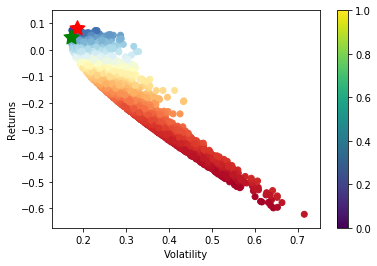

In [7]:
stocks = ['RCOM','PNB','ITC','PVR','TCS']
daily_mean = data.pct_change().mean()
cov_matrix = data.pct_change().cov()
n = 10000
result = np.zeros((4+len(stocks)-1,n))
for i in range(n):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(daily_mean * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    result[0,i] = portfolio_return
    result[1,i] = portfolio_std
    result[2,i] = result[0,i] / result[1,i]
    for j in range(len(weights)):
        result[j+3,i] = weights[j]
result_frame = pd.DataFrame(result.T,columns=['Return','STD','Sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
max_sharpe_port = result_frame.iloc[result_frame['Sharpe'].idxmax()]
min_vol_port = result_frame.iloc[result_frame['STD'].idxmin()]
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility');
plt.ylabel('Returns');
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=250);
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=250);
plt.colorbar();